In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv(r'E:\data1.csv')

In [3]:
df1.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji


In [4]:
data2 = pd.read_csv(r'E:\data2.csv')

In [5]:
data2.head(3)

,user_id,date,Saham_AUM,Saham_invested_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Campuran_AUM,Campuran_invested_amount
0,43195,2021-10-06,285066.0,280000.0,50008.0,50000.0,170072.0,170000.0,NaN,NaN
1,43195,2021-10-07,285377.0,280000.0,50012.0,50000.0,170200.0,170000.0,NaN,NaN
2,43195,2021-10-08,288188.0,280000.0,50016.0,50000.0,169983.0,170000.0,NaN,NaN


In [6]:
data2 = data2.fillna(0)

In [7]:
data2.isna().sum()

user_id                             0
date                                0
Saham_AUM                           0
Saham_invested_amount               0
Pasar_Uang_AUM                      0
Pasar_Uang_invested_amount          0
Pendapatan_Tetap_AUM                0
Pendapatan_Tetap_invested_amount    0
Campuran_AUM                        0
Campuran_invested_amount            0
dtype: int64

In [8]:
data2.drop('date', axis = 1, inplace = True)

In [9]:
data2 = data2.groupby('user_id').mean()

In [10]:
data2.head()

,Saham_AUM,Saham_invested_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Campuran_AUM,Campuran_invested_amount
user_id,,,,,,,,
43195,2.875747e+05,2.800000e+05,50063.444444,50000.000000,1.704109e+05,1.700000e+05,0.000000e+00,0.000000e+00
47757,2.751273e+05,2.764706e+05,0.000000,0.000000,7.235454e+06,7.217647e+06,0.000000e+00,0.000000e+00
50701,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,9.747644e+06,1.000000e+07
50961,4.414667e+06,4.150145e+06,401143.590909,400000.000000,8.016640e+05,8.000000e+05,4.337815e+05,4.545455e+05
51883,8.893929e+04,8.238095e+04,18113.666667,18095.238095,8.068681e+04,8.047619e+04,0.000000e+00,0.000000e+00


In [11]:
data2.shape

(14712, 8)

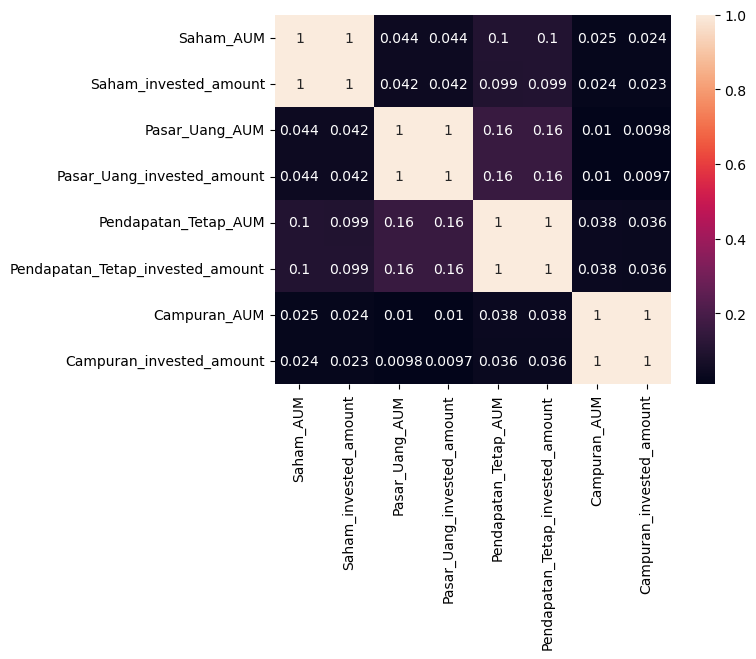

In [12]:
import seaborn as sns
sns.heatmap(data2.corr(), annot = True);

In [13]:
data2 = data2[data2['Saham_AUM'] != 0]

In [14]:
import matplotlib.pyplot as plt

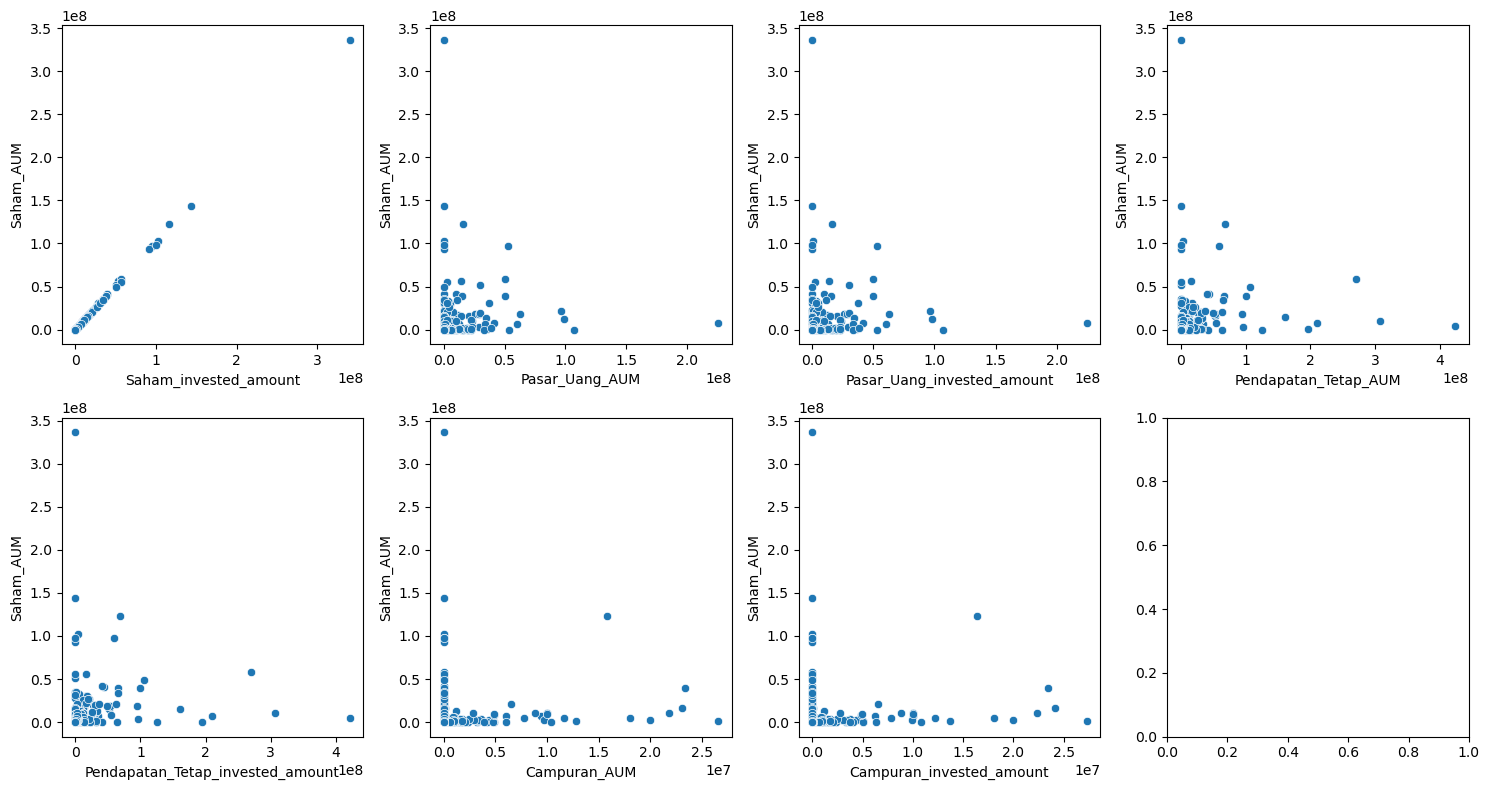

In [15]:
X = data2.drop('Saham_AUM', axis = 1)
y = data2['Saham_AUM']

fig, axes = plt.subplots(2,4, figsize = (15, 8))
for i, col in enumerate(X.columns):
    sns.scatterplot(x = col, y = 'Saham_AUM', data = data2, ax=axes[i//4, i%4])
plt.tight_layout()
plt.show()

In [16]:
data = data2[['Saham_AUM','Saham_invested_amount']]
data.head()

,Saham_AUM,Saham_invested_amount
user_id,,
43195,2.875747e+05,2.800000e+05
47757,2.751273e+05,2.764706e+05
50961,4.414667e+06,4.150145e+06
51883,8.893929e+04,8.238095e+04
53759,5.917108e+04,5.714286e+04


In [17]:
data_sampel = data.sample(n = 140, random_state = 42)
data_sampel.head()

,Saham_AUM,Saham_invested_amount
user_id,,
3913811,6.171198e+04,5.906977e+04
4000886,4.999495e+05,4.700000e+05
3977889,3.215737e+05,3.000000e+05
4035699,1.780453e+06,1.647273e+06
3917605,1.472609e+06,1.376000e+06


In [18]:
data_sampel.reset_index(drop = True, inplace = True)

In [19]:
def bulat(nilai):
    return int(nilai)
data_sampel.applymap(bulat)

,Saham_AUM,Saham_invested_amount
0,61711,59069
1,499949,470000
2,321573,300000
3,1780452,1647272
4,1472608,1376000
...,...,...
135,9159,9166
136,7800172,7732000
137,91417,84424
138,7436230,7133333


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
x = data_sampel['Saham_invested_amount']
y = data_sampel['Saham_AUM']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 22)

In [22]:
import numpy as np
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(X_test).reshape(-1,1)


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test, model.predict(X_test))

0.998610842806858

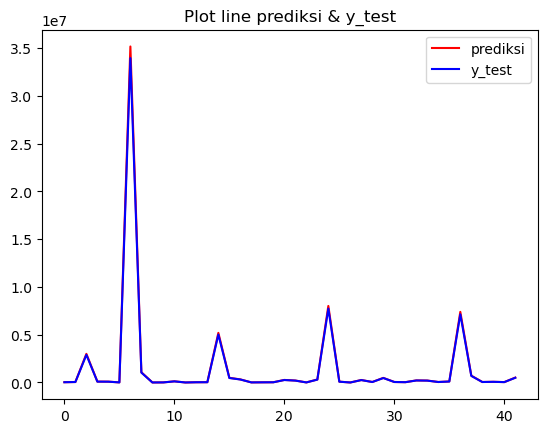

In [25]:
plt.plot(model.predict(X_test), c = 'red', label = 'prediksi')
plt.plot(y_test, c = 'blue', label = 'y_test')
plt.title('Plot line prediksi & y_test')
plt.legend()
plt.show()